In [177]:
#A Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for a restaurant.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
business = pd.read_json('yelp_business.json', lines=True)
checkin = pd.read_json('yelp_checkin.json', lines=True)
data = pd.read_json('yelp_data.json', lines=True)
photo = pd.read_json('yelp_photo.json', lines=True)
review = pd.read_json('yelp_review.json', lines=True)
tip = pd.read_json('yelp_tip.json', lines=True)
user = pd.read_json('yelp_user.json', lines=True)

In [178]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             188593 non-null  object 
 1   attributes          162807 non-null  object 
 2   business_id         188593 non-null  object 
 3   categories          188052 non-null  object 
 4   city                188593 non-null  object 
 5   hours               143791 non-null  object 
 6   is_open             188593 non-null  int64  
 7   latitude            188587 non-null  float64
 8   longitude           188587 non-null  float64
 9   name                188593 non-null  object 
 10  neighborhood        188593 non-null  object 
 11  postal_code         188593 non-null  object 
 12  review_count        188593 non-null  int64  
 13  stars               188593 non-null  float64
 14  state               188593 non-null  object 
 15  alcohol?            188593 non-nul

In [179]:
print(checkin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   business_id       157075 non-null  object
 1   time              157075 non-null  object
 2   weekday_checkins  157075 non-null  int64 
 3   weekend_checkins  157075 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB
None


In [180]:
print(review.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   business_id               188593 non-null  object 
 1   average_review_age        188593 non-null  float64
 2   average_review_length     188593 non-null  float64
 3   average_review_sentiment  188593 non-null  float64
 4   number_funny_votes        188593 non-null  int64  
 5   number_cool_votes         188593 non-null  int64  
 6   number_useful_votes       188593 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 10.1+ MB
None


In [181]:
print(photo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32976 entries, 0 to 32975
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             32976 non-null  object 
 1   average_caption_length  32976 non-null  float64
 2   number_pics             32976 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 773.0+ KB
None


In [182]:
print(tip.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121526 entries, 0 to 121525
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         121526 non-null  object 
 1   average_tip_length  121526 non-null  float64
 2   number_tips         121526 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ MB
None


In [183]:
df = data.merge(review, on='business_id', how='left')
df = df.merge(checkin, on='business_id', how='left')
df = df.merge(tip, on='business_id', how='left')
print(df.head())

               address                                         attributes  \
0    1314 44 Avenue NE  {'BikeParking': 'False', 'BusinessAcceptsCredi...   
1                       {'Alcohol': 'none', 'BikeParking': 'False', 'B...   
2  1335 rue Beaubien E  {'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...   
3      211 W Monroe St                                               None   
4  2005 Alyth Place SE             {'BusinessAcceptsCreditCards': 'True'}   

              business_id                                         categories  \
0  Apn5Q_b6Nz61Tq4XzPdf9A  Tours, Breweries, Pizza, Restaurants, Food, Ho...   
1  AjEbIBw6ZFfln7ePHha9PA  Chicken Wings, Burgers, Caterers, Street Vendo...   
2  O8S5hYJ1SMc8fA4QBtVujA  Breakfast & Brunch, Restaurants, French, Sandw...   
3  bFzdJJ3wp3PZssNEsyU23g                      Insurance, Financial Services   
4  8USyCYqpScwiNEb58Bt6CA  Home & Garden, Nurseries & Gardening, Shopping...   

        city                                            

In [189]:
print(df.isnull().sum())
print(df.info())
df.fillna(0, inplace=True)
print(df.info())

address                          0
attributes                   25786
business_id                      0
categories                     541
city                             0
hours                        44802
is_open                          0
latitude                         6
longitude                        6
name                             0
neighborhood                     0
postal_code                      0
review_count                     0
stars                            0
state                            0
alcohol?                         0
has_bike_parking                 0
takes_credit_cards               0
good_for_kids                    0
price_range                      0
take_reservations                0
has_wifi                         0
pic_count                   155617
average_review_age               0
average_review_length            0
average_review_sentiment         0
number_funny_votes               0
number_cool_votes                0
number_useful_votes 

In [197]:
X = df[[
    "average_review_age", 
    "average_review_length", 
    "average_review_sentiment",
    "has_bike_parking",
    "pic_count",
    "is_open",
    "latitude",
    "longitude",
    "review_count",
    "alcohol?",
    "takes_credit_cards",
    "good_for_kids",
    "price_range",
    "take_reservations",
    "has_wifi",
    "number_funny_votes",
    "number_cool_votes",
    "number_useful_votes",
    "weekday_checkins",
    "weekend_checkins",
    "average_tip_length",
    "number_tips"
]]

Y = df['stars']

for col in X:
    if col != "stars":  # Avoid self-correlation
        print(f"Correlation between stars and {col}: {df['stars'].corr(df[col])}")


Correlation between stars and average_review_age: -0.12564548217662141
Correlation between stars and average_review_length: -0.277081166923253
Correlation between stars and average_review_sentiment: 0.7821870918438218
Correlation between stars and has_bike_parking: 0.06808445390567085
Correlation between stars and pic_count: 0.001727280733274791
Correlation between stars and is_open: 0.051913177239486095
Correlation between stars and latitude: -0.09325533124511924
Correlation between stars and longitude: -0.08226511171542174
Correlation between stars and review_count: 0.032413313301725546
Correlation between stars and alcohol?: -0.04333212810315695
Correlation between stars and takes_credit_cards: 0.03774797023496702
Correlation between stars and good_for_kids: -0.030381991019304437
Correlation between stars and price_range: -0.05256472745725947
Correlation between stars and take_reservations: -0.02448603044314825
Correlation between stars and has_wifi: -0.039856897255561234
Correlatio

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [199]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [200]:
print(predictions)

[4.71933812 3.44233694 3.42589933 ... 4.56124299 3.20691139 4.5155744 ]


In [201]:
print(X_test.shape)  # Should be (number_of_samples, 1)
print(y_test.shape)  # Should be (number_of_samples,)
print(predictions.shape)  # Should be (number_of_samples,)

(37719, 22)
(37719,)
(37719,)


In [202]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6762214663659004
0.6731676438588594


[-9.47779833e-05 -6.03673074e-04  2.27983305e+00  1.49165409e-02
 -1.44341906e-03  6.84368659e-02 -8.10596450e-03  5.39470057e-04
  1.55594241e-04 -1.42359544e-01  2.68855512e-02 -1.23198275e-01
 -6.76556294e-02  3.25060131e-02 -1.31054709e-01 -1.34924126e-05
  8.62924839e-04 -1.92380293e-04  6.72504450e-05 -1.09593907e-04
 -4.86434910e-04 -9.69975923e-04]


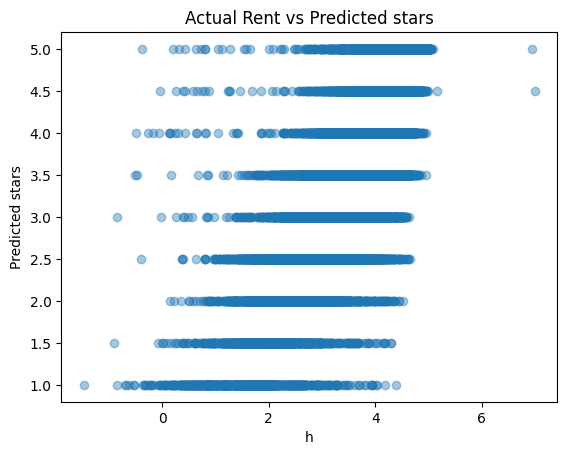

In [206]:
plt.scatter(predictions, y_test, alpha=0.4)

#plt.plot(range(len(y_test)), range(len(y_test)), color='red')
plt.xlabel("h")
plt.ylabel("Predicted stars")
plt.title("Actual Rent vs Predicted stars")
print(model.coef_)
plt.show()